<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_5/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Однозвенные LC фильтры. Определение их параметров и основные характеристики.</h1>

<h2>Задание: Для простейшего однозвенного полосового LC фильтра определить его параметры (С1 и С2 при заданных L и граничных частотах) и построить графики зависимостей коэффициента распространения, фазового сдвига от частоты. Представить сигналы и их спектры при прохождении через реальный (LC) и идеальный ПФ (на основе БПФ) для различных значений ширины полосы пропускания, настроенной на выделение одной из гармоник исходного сигнала.</h2>

<h3>Добавим необходимые библиотеки для работы</h3>

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

<h3>Напишем необходимые для рассчетов функции</h3>

<h4>Функция сигнала</h4>

In [2]:
def signal1(x):
    return np.sin(2.0 * pi * x) + 2.0 * np.cos(4.0 * pi * x) + 0.5 * np.cos(6.0 * pi * x)

<h4>Функция сигнала на выходе фильтра</h4>

In [3]:
def signal2(x):
    return (np.sin(2.0 * pi * x) * np.exp(-Gam(f, L, C1, C2).real) +
            2.0 * np.cos(4.0 * pi * x) * np.exp(-Gam(2.0 * f, L, C1, C2).real) +
            0.5 * np.cos(6.0 * pi * x) * np.exp(-Gam(3.0 * f, L, C1, C2).real))

<h4>Преобразование частоты f к w</h4>

In [4]:
def f2w(f):
    return 2.0 * pi * f

<h4>Функции для рассчета параметров</h4>

In [5]:
def Z(f, L, C2):
    return (1.0 - f2w(f) ** 2 * L * C2) / (f2w(f) * C2 * 1j)


def Y(f, C1):
    return 0.5 * f2w(f) * C1 * 1j


def Gam(f, L, C1, C2):
    ZY = Z(f, L, C2) * Y(f, C1)
    return 2.0 * np.arcsinh(np.sqrt(ZY))

<h4>Функция фильтра</h4>

In [6]:
def filter(time, signal, fl, fh):
    n = len(signal)
    freq = np.fft.fftfreq(n, time[1] - time[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if not fl <= abs(freq[i]) <= fh:
            spectr[i] *= 0 + 0j
    return np.fft.ifft(spectr)

<h2>Часть 1</h2>

<h3>Введем необходимые данные</h3>
<h4>Входные данные для ширины пропускания 15-25</h4>
<h5>Опорная частота сигнала: 10<br>
Временной интервал: 10<br>
Число временных отсчетов: 100000<br>
Нижняя граничная частота фильтра (fl > 0): 15<br>
Верхняя граничная частота фильтра: 25<br>
Индуктивность фильтра: 0.01</h5>

In [7]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

fl = float(input('Нижняя граничная частота фильтра (fl > 0) '))
fh = float(input('Верхняя граничная частота фильтра '))
L = float(input('Индуктивность фильтра '))

Опорная частота сигнала 10
Временной интервал 10
Число временных отсчетов 100000
Нижняя граничная частота фильтра (fl > 0) 15
Верхняя граничная частота фильтра 25
Индуктивность фильтра 0.01


<h3>Проведем рассчет параметров фильтра</h3>

In [12]:
C1 = 2.0 / L / (f2w(fh) ** 2 - f2w(fl) ** 2)
C2 = 1.0 / (f2w(fl) ** 2 * L)
freq = np.linspace(0, fh * 1.2, n)
Gama = Gam(freq, L, C1, C2)

print('Параметры фильтра:')
print('C1 = ', C1)
print('C2 = ', C2)
print('L = ', L)
print()
print('Затухание сигнала:')
print('A(', 1 * f, ') = ', Gam(f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 2 * f, ') = ', Gam(2 * f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 3 * f, ') = ', Gam(3 * f, L, C1, C2).real * 8.686, 'дБ')
print()
print('Амплитуды гармонических составляющих после прохождения через фильтр:')
print('U(', 1 * f, ') = ', 1.0 * 10 ** (-0.05 * Gam(f, L, C1, C2).real * 8.686), 'В')
print('U(', 2 * f, ') = ', 2.0 * 10 ** (-0.05 * Gam(2 * f, L, C1, C2).real * 8.686), 'В')
print('U(', 3 * f, ') = ', 0.5 * 10 ** (-0.05 * Gam(3 * f, L, C1, C2).real * 8.686), 'В')

Параметры фильтра:
C1 =  0.012665147955292218
C2 =  0.011257909293593089
L =  0.01

Затухание сигнала:
A( 10.0 ) =  9.265637903495866 дБ
A( 20.0 ) =  0.0 дБ
A( 30.0 ) =  13.120617760610271 дБ

Амплитуды гармонических составляющих после прохождения через фильтр:
U( 10.0 ) =  0.3441264900079898 В
U( 20.0 ) =  2.0 В
U( 30.0 ) =  0.1103923850093558 В


<h3>Графики зависимостей коэффициента распространения, фазового сдвига от частоты</h3>

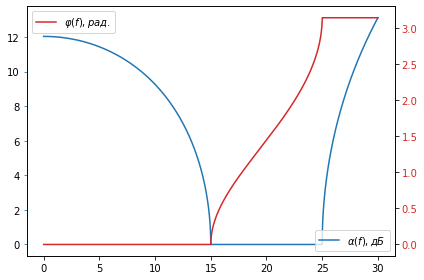

In [13]:
plt.plot(freq, Gama.real * 8.686, color='tab:blue', label=r'$\alpha(f), дБ$')
plt.tick_params(axis='y', color='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:red', label=r'$\varphi(f), рад.$')
plt.tick_params(axis='y', labelcolor='tab:red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h3>Введем временную шкалу и сигналы</h3>

In [14]:
t = np.linspace(0, T, n)
uinp0 = signal1(f * t)
uout1 = signal2(f * t)
uout2 = filter(t, uinp0, fl, fh).real

<h3>Графики сигналов</h3>

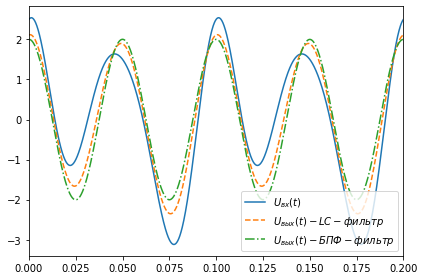

In [15]:
plt.plot(t, uinp0, label='$U_{вх}(t)$')
plt.plot(t, uout1, '--', label='$U_{вых}(t) - LC-фильтр$')
plt.plot(t, uout2, '-.', label='$U_{вых}(t) - БПФ-фильтр$')
plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h3>Введем частотную шкалу и спектры</h3>

In [16]:
sp_inp = np.abs(np.fft.fft(uinp0)) / n * 2.0
sp_inp[0] *= 0.5
sp_out = np.abs(np.fft.fft(uout1)) / n * 2.0
sp_out[0] *= 0.5
freq = np.fft.fftfreq(n, T / n)

<h3>Графики спектров</h3>

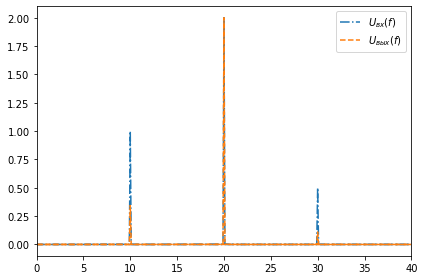

In [17]:
plt.plot(freq, sp_inp, '-.', label='$U_{вх}(f)$')
plt.plot(freq, sp_out, '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h2>Часть 2</h2>

<h3>Введем необходимые данные</h3>
<h4>Входные данные для ширины пропускания 19-21</h4>
<h5>Опорная частота сигнала: 10<br>
Временной интервал: 10<br>
Число временных отсчетов: 100000<br>
Нижняя граничная частота фильтра (fl > 0): 19<br>
Верхняя граничная частота фильтра: 21<br>
Индуктивность фильтра: 0.01</h5>

In [18]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

fl = float(input('Нижняя граничная частота фильтра (fl > 0) '))
fh = float(input('Верхняя граничная частота фильтра '))
L = float(input('Индуктивность фильтра '))

Опорная частота сигнала 10
Временной интервал 10
Число временных отсчетов 100000
Нижняя граничная частота фильтра (fl > 0) 19
Верхняя граничная частота фильтра 21
Индуктивность фильтра 0.01


<h3>Проведем рассчет параметров фильтра</h3>

In [19]:
C1 = 2.0 / L / (f2w(fh) ** 2 - f2w(fl) ** 2)
C2 = 1.0 / (f2w(fl) ** 2 * L)
freq = np.linspace(0, fh * 1.2, n)
Gama = Gam(freq, L, C1, C2)

print('Параметры фильтра:')
print('C1 = ', C1)
print('C2 = ', C2)
print('L = ', L)
print()
print('Затухание сигнала:')
print('A(', 1 * f, ') = ', Gam(f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 2 * f, ') = ', Gam(2 * f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 3 * f, ') = ', Gam(3 * f, L, C1, C2).real * 8.686, 'дБ')
print()
print('Амплитуды гармонических составляющих после прохождения через фильтр:')
print('U(', 1 * f, ') = ', 1.0 * 10 ** (-0.05 * Gam(f, L, C1, C2).real * 8.686), 'В')
print('U(', 2 * f, ') = ', 2.0 * 10 ** (-0.05 * Gam(2 * f, L, C1, C2).real * 8.686), 'В')
print('U(', 3 * f, ') = ', 0.5 * 10 ** (-0.05 * Gam(3 * f, L, C1, C2).real * 8.686), 'В')

Параметры фильтра:
C1 =  0.06332573977646105
C2 =  0.0070167024683059406
L =  0.01

Затухание сигнала:
A( 10.0 ) =  23.51242438819949 дБ
A( 20.0 ) =  0.0 дБ
A( 30.0 ) =  27.927778919042762 дБ

Амплитуды гармонических составляющих после прохождения через фильтр:
U( 10.0 ) =  0.06673885947907471 В
U( 20.0 ) =  2.0 В
U( 30.0 ) =  0.02007155678275754 В


<h3>Графики зависимостей коэффициента распространения, фазового сдвига от частоты</h3>

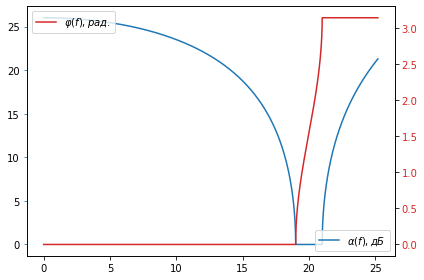

In [20]:
plt.plot(freq, Gama.real * 8.686, color='tab:blue', label=r'$\alpha(f), дБ$')
plt.tick_params(axis='y', color='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:red', label=r'$\varphi(f), рад.$')
plt.tick_params(axis='y', labelcolor='tab:red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h3>Введем временную шкалу и сигналы</h3>

In [21]:
t = np.linspace(0, T, n)
uinp0 = signal1(f * t)
uout1 = signal2(f * t)
uout2 = filter(t, uinp0, fl, fh).real

<h3>Графики сигналов</h3>

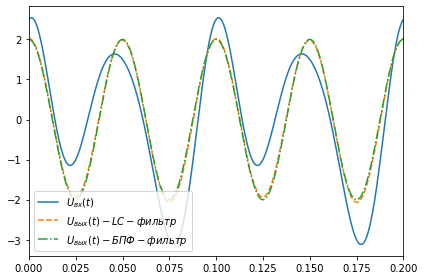

In [22]:
plt.plot(t, uinp0, label='$U_{вх}(t)$')
plt.plot(t, uout1, '--', label='$U_{вых}(t) - LC-фильтр$')
plt.plot(t, uout2, '-.', label='$U_{вых}(t) - БПФ-фильтр$')
plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h3>Введем частотную шкалу и спектры</h3>

In [23]:
sp_inp = np.abs(np.fft.fft(uinp0)) / n * 2.0
sp_inp[0] *= 0.5
sp_out = np.abs(np.fft.fft(uout1)) / n * 2.0
sp_out[0] *= 0.5
freq = np.fft.fftfreq(n, T / n)

<h3>Графики спектров</h3>

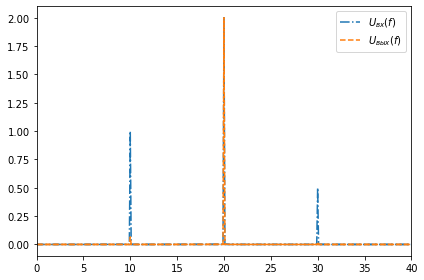

In [24]:
plt.plot(freq, sp_inp, '-.', label='$U_{вх}(f)$')
plt.plot(freq, sp_out, '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h2>Часть 3</h2>

<h3>Введем необходимые данные</h3>
<h4>Входные данные для ширины пропускания 19.99-20.01</h4>
<h5>Опорная частота сигнала: 10<br>
Временной интервал: 10<br>
Число временных отсчетов: 100000<br>
Нижняя граничная частота фильтра (fl > 0): 19.99<br>
Верхняя граничная частота фильтра: 20.01<br>
Индуктивность фильтра: 0.01</h5>

In [25]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

fl = float(input('Нижняя граничная частота фильтра (fl > 0) '))
fh = float(input('Верхняя граничная частота фильтра '))
L = float(input('Индуктивность фильтра '))

Опорная частота сигнала 10
Временной интервал 10
Число временных отсчетов 100000
Нижняя граничная частота фильтра (fl > 0) 19.99
Верхняя граничная частота фильтра 20.01
Индуктивность фильтра 0.01


<h3>Проведем рассчет параметров фильтра</h3>

In [26]:
C1 = 2.0 / L / (f2w(fh) ** 2 - f2w(fl) ** 2)
C2 = 1.0 / (f2w(fl) ** 2 * L)
freq = np.linspace(0, fh * 1.2, n)
Gama = Gam(freq, L, C1, C2)

print('Параметры фильтра:')
print('C1 = ', C1)
print('C2 = ', C2)
print('L = ', L)
print()
print('Затухание сигнала:')
print('A(', 1 * f, ') = ', Gam(f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 2 * f, ') = ', Gam(2 * f, L, C1, C2).real * 8.686, 'дБ')
print('A(', 3 * f, ') = ', Gam(3 * f, L, C1, C2).real * 8.686, 'дБ')
print()
print('Амплитуды гармонических составляющих после прохождения через фильтр:')
print('U(', 1 * f, ') = ', 1.0 * 10 ** (-0.05 * Gam(f, L, C1, C2).real * 8.686), 'В')
print('U(', 2 * f, ') = ', 2.0 * 10 ** (-0.05 * Gam(2 * f, L, C1, C2).real * 8.686), 'В')
print('U(', 3 * f, ') = ', 0.5 * 10 ** (-0.05 * Gam(3 * f, L, C1, C2).real * 8.686), 'В')

Параметры фильтра:
C1 =  6.33257397764578
C2 =  0.006338911304222508
L =  0.01

Затухание сигнала:
A( 10.0 ) =  63.52263131715431 дБ
A( 20.0 ) =  0.0 дБ
A( 30.0 ) =  67.95966052333624 дБ

Амплитуды гармонических составляющих после прохождения через фильтр:
U( 10.0 ) =  0.0006666047963101263 В
U( 20.0 ) =  2.0 В
U( 30.0 ) =  0.00019998019069264542 В


<h3>Графики зависимостей коэффициента распространения, фазового сдвига от частоты</h3>

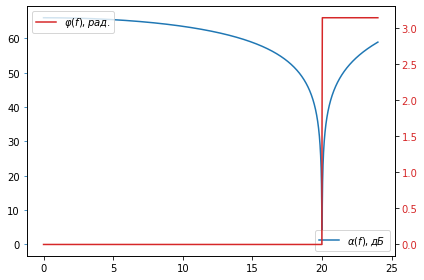

In [27]:
plt.plot(freq, Gama.real * 8.686, color='tab:blue', label=r'$\alpha(f), дБ$')
plt.tick_params(axis='y', color='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:red', label=r'$\varphi(f), рад.$')
plt.tick_params(axis='y', labelcolor='tab:red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h3>Введем временную шкалу и сигналы</h3>

In [28]:
t = np.linspace(0, T, n)
uinp0 = signal1(f * t)
uout1 = signal2(f * t)
uout2 = filter(t, uinp0, fl, fh).real

<h3>Графики сигналов</h3>

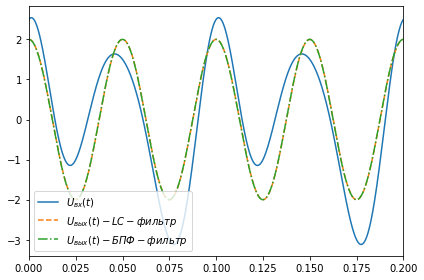

In [29]:
plt.plot(t, uinp0, label='$U_{вх}(t)$')
plt.plot(t, uout1, '--', label='$U_{вых}(t) - LC-фильтр$')
plt.plot(t, uout2, '-.', label='$U_{вых}(t) - БПФ-фильтр$')
plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h3>Введем частотную шкалу и спектры</h3>

In [30]:
sp_inp = np.abs(np.fft.fft(uinp0)) / n * 2.0
sp_inp[0] *= 0.5
sp_out = np.abs(np.fft.fft(uout1)) / n * 2.0
sp_out[0] *= 0.5
freq = np.fft.fftfreq(n, T / n)

<h3>Графики спектров</h3>

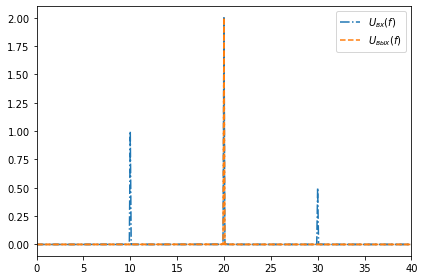

In [31]:
plt.plot(freq, sp_inp, '-.', label='$U_{вх}(f)$')
plt.plot(freq, sp_out, '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()